# Canaries
## Creating an histogram from each of the sarifo rtb time series
(time,qps_cap,qps_eff,avg_lat,max_lat,timeouts,bids)

Parsing data from safirortb.log

In [8]:
!./get_logs.sh 172.19.5.140 2000000 invid
#!./get_logs.sh 172.19.6.171 2000000 panoptic
!./get_logs.sh 172.19.6.85 2000000 prod
!./parse_logs.sh invid
#!./parse_logs.sh panoptic
!./parse_logs.sh prod
#!cat ../data/silver.csv | sed s'/.$//' > ../data/silver1.csv
!ls ../data/

invid.csv  invid.log  prod.csv	prod.log


In [9]:
import numpy as np
import os
from stats_util import Type, get_serie
import math

path = os.getcwd()
path 
invid_ds = np.loadtxt(path + "/../data/invid.csv", delimiter=",")
invid_ds = np.delete(invid_ds, [1,], axis=1)

# panoptic_ds = np.loadtxt(path + "/../data/panoptic.csv", delimiter=",")
# panoptic_ds = np.delete(panoptic_ds, [1,], axis=1)

prod_ds = np.loadtxt(path + "/../data/prod.csv", delimiter=",")
prod_ds = np.delete(prod_ds, [1,], axis=1)


In [10]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')
invid = get_serie(invid_ds, Type.qps_cap, None, None)
# panoptic = get_serie(panoptic_ds, Type.qps_cap, None, None)
prod = get_serie(prod_ds, Type.qps_cap, None, None)

<Figure size 2700x1260 with 0 Axes>

((201.468896713615, 12.600180618774596),
 (228.76504199366653, 15.760485011881675))

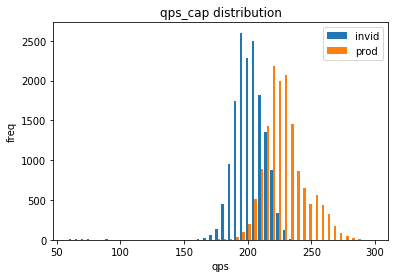

In [11]:
plt.hist([invid,prod], bins=50, label=['invid','prod'])
plt.title('qps_cap distribution')
plt.xlabel('qps')
plt.ylabel('freq');
plt.legend(loc='upper right')
(invid.mean(),math.sqrt(invid.var())),(prod.mean(),math.sqrt(prod.var()))

((180.40108242044863, 9.213134257976037),
 (165.0607875533526, 40.68511892076112))

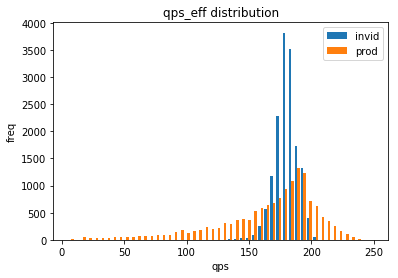

In [12]:
invid = get_serie(invid_ds, Type.qps_eff, None, None)
# panoptic = get_serie(panoptic_ds, Type.qps_eff, None, None)
prod = get_serie(prod_ds, Type.qps_eff, None, None)
plt.hist([invid,prod], bins=50, label=['invid','prod'])
plt.title('qps_eff distribution')
plt.xlabel('qps')
plt.ylabel('freq');
plt.legend(loc='upper right')
(invid.mean(),math.sqrt(invid.var())),(prod.mean(),math.sqrt(prod.var()))

((0.00497814945226917, 0.0004895815898450892),
 (0.0043819427233925375, 0.00029453155168930703))

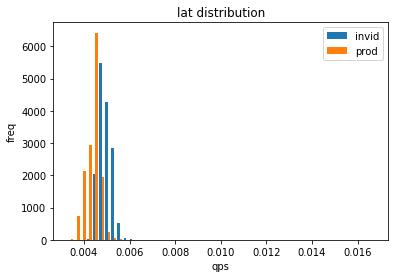

In [13]:
invid = get_serie(invid_ds, Type.avg_lat, None, None)
# panoptic = get_serie(panoptic_ds, Type.avg_lat, None, None)
prod = get_serie(prod_ds, Type.avg_lat, None, None)
plt.hist([invid,prod], bins=50, label=['invid','prod'])
plt.title('lat distribution')
plt.xlabel('qps')
plt.ylabel('freq');
plt.legend(loc='upper right')
(invid.mean(),math.sqrt(invid.var())),(prod.mean(),math.sqrt(prod.var()))

((120.12219613980177, 25.699003323224836),
 (99.57290375877737, 14.18000148685151))

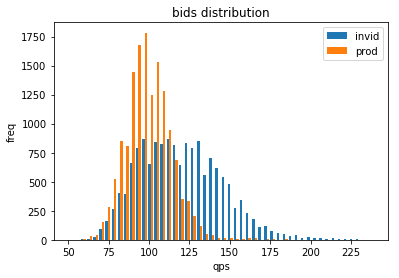

In [14]:
invid = get_serie(invid_ds, Type.bids, None, None)
# panoptic = get_serie(panoptic_ds, Type.bids, None, None)
prod = get_serie(prod_ds, Type.bids, None, None)
plt.hist([invid,prod], bins=50, label=['invid','prod'])
plt.title('bids distribution')
plt.xlabel('qps')
plt.ylabel('freq');
plt.legend(loc='upper right')
(invid.mean(),math.sqrt(invid.var())),(prod.mean(),math.sqrt(prod.var()))


In [15]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(silver_ds[:,1], label="qps_cap_silver")
plt.plot(silver_ds[:, 2], label="qps_eff_silver")
plt.plot(silver_ds[:, 3], label="avg_lat_silver")
plt.plot(silver_ds[:, 4], label="bid_silver")

plt.plot(canary_ds[:,1], label="qps_cap_production")
plt.plot(canary_ds[:, 2], label="qps_eff_production")
plt.plot(canary_ds[:, 3], label="avg_lat_production")
plt.plot(canary_ds[:, 4], label="bid_production")

plt.hist(dataset,bins=50)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('time serie')
plt.xlabel('queue size')
plt.ylabel('auctions');
plt.legend()
plt.show()

NameError: name 'silver_ds' is not defined

<Figure size 1200x560 with 0 Axes>